                                              tweets                   ID  \
0  RT @SierraClub: We are a nation of laws and th...  1185741994657796097   
1  RT @ozh_13: Are these the terrorists #Erdogan ...  1185741635876864000   
2  RT @QBlueSkyQ: @POTUS @GenFlynn @DevinNunes @j...  1185741123391774720   
3  RT @ozh_13: Are these the terrorists #Erdogan ...  1185741058212356096   
4  RT @dmedrek: @funder @realDonaldTrump May the ...  1185740424180305922   
5  RT @laila10647176: i will create Facebook busi...  1185740046525181952   
6  RT @BettyHinesCrus1: @ClassicaBlue @ewarren Li...  1185739964870549504   
7  RT @laila10647176: i will create Facebook busi...  1185739713593991171   
8  @realDonaldTrump Lindsey Graham 🤔 #TrumpImpeac...  1185739177855504385   
9  @EvanMcMullin But as long as the whole GOP is ...  1185737389634928640   

   Len                Date               Source  Num of Likes  \
0  139 2019-10-20 02:18:16      Twitter Web App             0   
1  140 2019-10-20 02:1

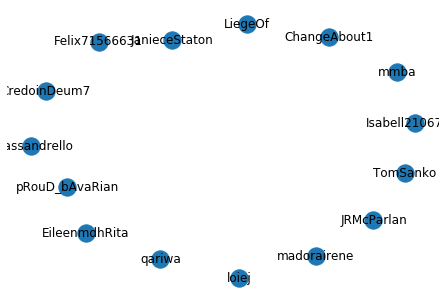

In [41]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

from tweepy import API
from tweepy import Cursor 

from textblob import TextBlob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import re #regular expression 
import requests
import networkx as nx

#credentianls
import surukeys

#twitter client
class TwitterClient():
    def __init__(self, twitter_user = None):
        self.auth = Authentication().authenticate_twitter_app()
        self.twitter_client = API(self.auth)
        
        self.twitter_user = twitter_user
        
    def get_twitter_client_api(self):
        return self.twitter_client

    #funtion to get tweets
    def get_user_timeline_tweets(self, num_tweets):
        tweets =[]
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets
    
    
    def get_friend_list(self, num_friends):
        friend_list=[]
        for friend in Cursor(self.twitter_client.friends, id= self.twitter_user).items(num_friends):
            friend_list.append(friends)
        return friend_list
    
    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets =[]
        for tweet in Cursor (self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets
    
    
#authentication class
class Authentication():
    def authenticate_twitter_app(self):
        auth = OAuthHandler(surukeys.CONSUMER_KEY, surukeys.CONSUMER_SECRET)
        auth.set_access_token(surukeys.TOKEN_KEY, surukeys.TOKEN_SECRET)
        return auth
    
    
#class for streaming & processing live tweets
class TwitterStreamer ():
    def __init__(self):
        self.twitter_authenticator = Authentication()
    
    
    def stream_tweets (self, fetched_tweets_filename, hash_tag_list):
        # This handles twittter authentication & the connection to the twitter streaming api
        listener = TwitterLis(fetched_tweets_filename)
        auth = self.twitter_authenticator.authenticate_twitter_app()
        stream = Stream(auth, listener)
    
        #focused on some keywords of hashtags
        stream.filter(track=hash_tag_list)


#printing tweets & writing it into a file
class TwitterLis(StreamListener):
    def __init__ (self,fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename
    
    def on_data(self,data): #take data that is streamed in from the stream listener so the one that's listening for tweets
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("error on data: %s" %str(e))
        return True
 
    
    def on_error(self, status): #overwriting & print the status methos 
        if status == 420:
            return False #kill connection -return false data method in case rate limit occurs
        print(status)
        
#class responsible for analyzing and categorizing tweets
class TweetAnalyzer():
       
    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def analyze_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1
  
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

        df['ID'] = np.array([tweet.id for tweet in tweets])
        df['Len'] = np.array([len(tweet.text) for tweet in tweets])
        df['Date'] = np.array([tweet.created_at for tweet in tweets])
        df['Source'] = np.array([tweet.source for tweet in tweets])
        df['Num of Likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['Num of Retweets'] = np.array([tweet.retweet_count for tweet in tweets])
        df['Name'] = np.array([tweet.user.screen_name for tweet in tweets])
        

        return df
    

        
        
        
       
    
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    #tweets = api.user_timeline(screen_name="realDonaldTrump", count=200)
    #tweets= api.search(q='#MentalHealth', count=20)
    tweets= api.search(q='#TrumpImpeachment')
    
    df = tweet_analyzer.tweets_to_data_frame(tweets)
    df['Sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])

    print(df.head(10))
    
    #drawing the graph
    nodes = []
    for name in df['Name']:
        nodes.append(name)
    #nodes.append(tweet.user.screen_name for user in tweets)
    
    G = nx.Graph()
    #nx.draw_networkx_nodes(G, nodelist = nodes)
    G.add_nodes_from(nodes)
    nx.draw(G, with_labels = True)
 
    
    #tweets = api.user_timeline(screen_name="KylieJenner", count=200)
    #df = tweet_analyzer.tweets_to_data_frame(tweets)
    #df['Sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])

    #print(df.head(10))
        

In [19]:
nx.draw_networkx_nodes?

In [13]:
nx.draw?